In [20]:
import numpy as np 
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
nv1 = np.array([1,2,3,4])
nv2 = np.array([0,1,0,-1])

In [4]:
print(np.dot(nv1,nv2))
print(np.sum( nv1*nv2))

-2


In [12]:
#create random matrices
A = np.random.randn(3,4)
B = np.random.randn(4,5)
C = np.random.randn(3,7)

In [13]:
print(np.round( A @ B , 2)), print(' ')

[[-0.36  2.68  0.7  -1.96  2.74]
 [ 1.21 -1.43  1.64  3.71 -0.31]
 [ 0.4  -2.01 -0.62  1.25 -2.11]]
 


(None, None)

In [15]:
#print(np.round( A@A ,2)), print(' ')
print(np.round( C.T@A, 2)) # El chiste está en transponerlos para que las dimensiones interiores sean acordes. 

[[ 0.23 -0.1   0.99  0.33]
 [ 0.39  0.58  0.95  0.22]
 [-0.57 -0.16 -3.35 -1.03]
 [-2.31  6.08 -0.36 -1.21]
 [-2.49  5.68 -4.77 -2.49]
 [-1.48  0.77 -8.99 -2.94]
 [ 1.69 -2.6   1.88  1.08]]


In [19]:
A = torch.randn(3,4)
B = torch.randn(4,5)
C1 = np.random.randn(4,7)
C2 = torch.tensor ( C1, dtype=torch.float)

print(np.round( A@B ,2)), print(' ')
#print(np.round( A@B.T , 2)), print(' ')
print(np.round( A@C1 , 2)), print(' ')
print(np.round( A@C2 , 2)),print(' )')

tensor([[-1.9500,  1.4700, -1.6000,  4.9100,  5.1800],
        [ 2.0800, -1.4900, -1.2000,  1.8200,  2.2600],
        [-1.4900, -0.6100,  0.1300, -0.1300,  1.8900]])
 
tensor([[-2.2600, -4.6800, -5.1900, -1.4500, -0.2800,  1.4100, -2.3100],
        [-0.6600,  0.9700, -1.8600,  1.7100,  0.2300, -0.7000, -2.0600],
        [-0.4400, -0.4600,  0.4100, -0.9000, -1.3300,  2.5700,  0.4300]],
       dtype=torch.float64)
 
tensor([[-2.2600, -4.6800, -5.1900, -1.4500, -0.2800,  1.4100, -2.3100],
        [-0.6600,  0.9700, -1.8600,  1.7100,  0.2300, -0.7000, -2.0600],
        [-0.4400, -0.4600,  0.4100, -0.9000, -1.3300,  2.5700,  0.4300]])
 )


(None, None)

In [22]:
# Softmax manual en numpy
# Lista de numeros
z = [1,2,3]

#Computar el softmax
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den 

print(sigma) 
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


[-2  8  2  3  6 -1 -5 13 11 -2  0 14 12  2  8  5  4 -5  0  1 10  1 -2  6
  4]


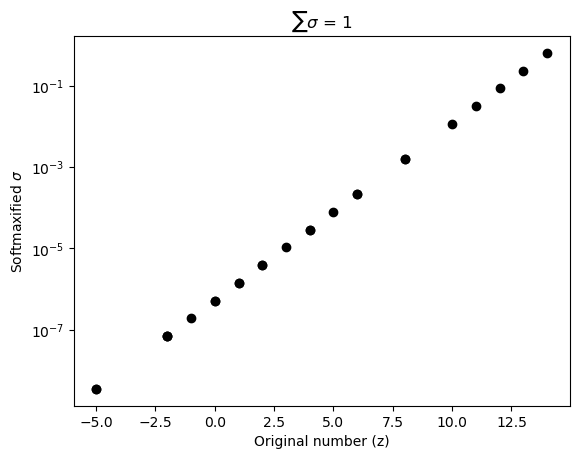

In [27]:
#Ahora con Enteros random
z = np.random.randint(-5, high=15, size=25)
print(z)

#computar softmax
num = np.exp(z)
den = np.sum( num )
sigma = num / den

#Comparar
plt.plot(z,sigma, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

In [28]:
#Haciendo el softmax con PyTorch
#Crear una instancia de la clase activadora de Softmax
softFun = nn.Softmax(dim=0)

#aplicar datos a la funcion
sigmaT = softFun( torch.Tensor(z))

print(sigmaT)

tensor([7.1351e-08, 1.5716e-03, 3.8957e-06, 1.0589e-05, 2.1270e-04, 1.9395e-07,
        3.5524e-09, 2.3325e-01, 3.1567e-02, 7.1351e-08, 5.2722e-07, 6.3404e-01,
        8.5808e-02, 3.8957e-06, 1.5716e-03, 7.8246e-05, 2.8785e-05, 3.5524e-09,
        5.2722e-07, 1.4331e-06, 1.1613e-02, 1.4331e-06, 7.1351e-08, 2.1270e-04,
        2.8785e-05])


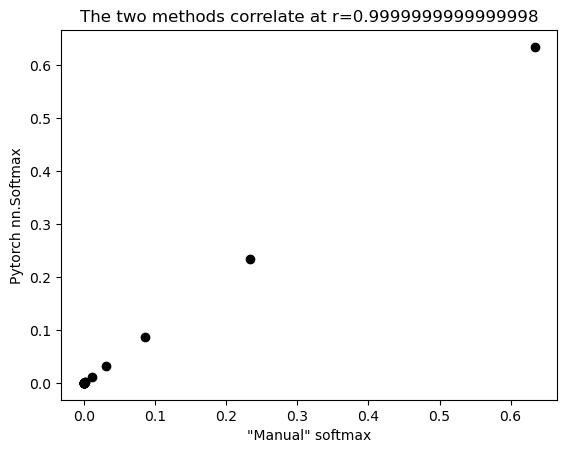

In [29]:
#Show
plt.plot(sigma, sigmaT, 'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()